# Prediction of soft churn and rock star

goals: Predict soft churn and rock star in the next month

### Read the data set

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # for plot styling
import numpy as np
import pandas as pd
%matplotlib inline

SFC = pd.read_csv("modeldataNoCensor.txt")
idtrain = pd.read_csv("idtrain.csv")

In [2]:
# Join the 2 table so that we can split the train and test set
SFC_joined = pd.merge(SFC, idtrain, how='inner', on = 'SubscriptionId').copy()
SFC_joined['churn'] = SFC_joined['churn'].to_frame().copy()

# Create predictive variables readingDayNum_next_month and churn_next_month
SFC_joined = SFC_joined.sort_values(['SubscriptionId', 'month'], ascending=[True, False]).copy()
SFC_joined['readingDayNum_next_month'] = SFC_joined.groupby(['SubscriptionId'])['readingDayNum'].shift(1)
SFC_joined['churn_next_month'] = SFC_joined.groupby(['SubscriptionId'])['churn'].shift(1)
SFC_joined = SFC_joined.dropna(subset=['churn_next_month']).copy()
SFC_joined.reset_index(drop=True, inplace=True) # reset the index
SFC_joined['churn_next_month'] = SFC_joined['churn_next_month'].astype(np.int64).copy()

In [3]:
# # Join the 2 table so that we can split the train and test set
# SFC_joined = pd.merge(SFC, idtrain, how='inner', on = 'SubscriptionId').copy()
# SFC_joined['churn'] = SFC_joined['churn'].to_frame().copy()

# # Create predictive variables readingDayNum_next_month and churn_next_month
# SFC_joined = SFC_joined.sort_values(['SubscriptionId', 'month'], ascending=[True, False]).copy()
# SFC_joined['readingDayNum_next_month'] = SFC_joined.groupby(['SubscriptionId'])['readingDayNum'].shift(1)
# SFC_joined['readingDayNum_last_month'] = SFC_joined.groupby(['SubscriptionId'])['readingDayNum'].shift(-1) # David
# SFC_joined['churn_next_month'] = SFC_joined.groupby(['SubscriptionId'])['churn'].shift(1)
# SFC_joined['churn_last_month'] = SFC_joined.groupby(['SubscriptionId'])['churn'].shift(-1) # David
# SFC_joined = SFC_joined.dropna(subset=['churn_next_month']).copy()
# SFC_joined = SFC_joined.dropna(subset=['readingDayNum_next_month']).copy()

# # Build a new column to indicate if that row has an "NA" at t-1
# SFC_joined['readingDayNum_last_month_NA'] = np.where(pd.isna(SFC_joined['readingDayNum_last_month']), 1, 0)
# SFC_joined['churn_last_month_NA'] = np.where(pd.isna(SFC_joined['churn_last_month']), 1, 0)
# SFC_joined.head(8)

# # Use the data at t or 0 to replace the "NA" data at t-1
# SFC_joined['readingDayNum_last_month'] = np.where(pd.isna(SFC_joined['readingDayNum_last_month']), SFC_joined['readingDayNum'], SFC_joined['readingDayNum_last_month'])
# SFC_joined['churn_last_month'] = np.where(pd.isna(SFC_joined['churn_last_month']), SFC_joined['churn'], SFC_joined['churn_last_month'])
# SFC_joined.head(5)

In [4]:
# Tranform some data
import datetime
SFC_joined['start_datetime'] = pd.to_datetime(SFC_joined.start_date)
# extract year, month, day 
SFC_joined['start_date_year'] = SFC_joined['start_datetime'].dt.year
SFC_joined['start_date_month'] = SFC_joined['start_datetime'].dt.month
SFC_joined['start_date_day'] = SFC_joined['start_datetime'].dt.day

# delete stop date, start date and start datetime
SFC_joined = SFC_joined.drop(['stop_date', 'start_date', 'start_datetime', 'SubscriptionId'], axis=1).copy()
# FIll the missing value (All missing value are categorical)
SFC_joined.fillna('Missing', inplace=True)

pd.set_option('display.max_columns', None)
SFC_joined.head()

,multiStop,ProductUc,DeliveryScheduleUc,leftCensored,censorDaysL,SubscriptionType,Description,month,churn,time,pv,readingDayNum,sessionNum,timePV,pvDay,sessionDay,entropy,device_type,mobileUse,desktopUse,tabletUse,referrer_type,first_hit_referrer_type,geo_city,geo_region,geo_country,ad_block_status,abDisabledPct,abEnabledPct,abnoResponsePct,isEngage,season,home,news:bay area & state,syncronex,news,news:crime,news:politics,business,sports,sports:golden state warriors,sports:giants,food:restaurants,the take,food,classifieds:realestate,living:style,special projects,entertainment,local,news:california wildfires,sports:49ers,trivia,chronicle vault,sports:sports columnists,travel,entertainment:movies & tv,food:wine & beer,news:us news,opinion:editorials,sports:oakland athletics,ion,food:inside scoop,opinion,profile,entertainment:blogs,business:net worth - kathleen pender,news:science,entertainment:music,search,news:world news,our san francisco,living,sports:college,news:education,sports:oakland raiders,opinion:open forum,entertainment:garchik,living:outdoors,entertainment:performance,entertainment:arts & galleries,biz & tech,home:promotions and contests,membership,food:recipes,opinion:opinion columnists,entertainment:books,living:home & garden,election,news:houston & texas,frequently asked questions,customer service,sports:golf,news:health,newsletters,opinion:letters to the editor,business:technology,news:weather,shopping:shopify,living:burning man,sports:san jose sharks,visionsf,living:green,page not found,sf chronicle,news:medical news,entertainment:horoscopes,chronicle investigations,entertainment:arts & theater,entertainment:dear abby,entertainment:the wrap,newsroom contacts,sports:Pro teams,adBlock,nonHome,homePVPct,homePVDay,nonHomePVDay,sentimentScore,Unnamed: 0,train,readingDayNum_next_month,churn_next_month,start_date_year,start_date_month,start_date_day
0,True,SfChron,22222222.3,0,0,D,eEdition,4,0,345.345000,10,1,2,34.534500,10.000000,2.000000,0.943348,Desktop,0.000000,1.000000,0.0,Inside Your Site,Typed/Bookmarked,davis,California,United States,abDisabled,1.00,0.00,0.0,1,Summer,4,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0.400000,4.000000,6.000000,0,1,True,1.0,1,2018,3,10
1,True,SfChron,22222222.3,0,0,D,eEdition,3,0,3925.938673,32,3,5,122.685584,10.666667,1.666667,0.692239,Desktop,0.000000,1.000000,0.0,Inside Your Site,Typed/Bookmarked,davis,California,United States,abDisabled,1.00,0.00,0.0,1,Spring,8,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0.250000,2.666667,8.000000,0,1,True,1.0,0,2018,3,10
2,True,SfChron,22222222.3,0,0,D,eEdition,2,0,820.444000,9,3,4,91.160444,3.000000,1.333333,0.636514,Desktop,0.000000,1.000000,0.0,Inside Your Site,Typed/Bookmarked,davis,California,United States,abDisabled,1.00,0.00,0.0,1,Spring,6,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0.666667,2.000000,1.000000,0,1,True,3.0,0,2018,3,10
3,True,SfChron,22222222.3,0,0,D,eEdition,1,0,282.506667,4,1,1,70.626667,4.000000,1.000000,1.039721,Desktop,0.000000,1.000000,0.0,Inside Your Site,Typed/Bookmarked,davis,California,United States,abDisabled,0.75,0.25,0.0,1,Spring,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.500000,2.000000,2.000000,-1,1,True,3.0,0,2018,3,10
4,True,SfChron,22222222.1,0,0,D,Universal Digital Access,1,0,473.258833,20,9,11,23.662942,2.222222,1.222222,1.070047,Mobile Phone,0.842105,0.157895,0.0,Inside Your Site,Others,sacramento,California,United States,abDisabled,0.00,0.00,0.0,1,Summer,0,11,0,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,

In [5]:
train = SFC_joined[SFC_joined['train'] == True].copy()
print('train size: ', len(train))
test = SFC_joined[SFC_joined['train'] != True].copy()
print('test size: ', len(test))

train size:  36073
test size:  17886


### data prepareation

1. Target Variables: 

(1) we consider churn and readingDayNum of next month as Target Variables

(2) need to create new variable: if it is soft churn next month or not:
for each sunscription ID, and each month, create: (Q4 need to be discussed)
'churn_next_month'(0,1),'soft_churn_next_month'(0,1),'rock_star_next_month','log_readingDayNum_next_month'

2. Predictive variables

(3)predictive variables:to make it simple, mainly consider behavior of a single month, the only historical data considerded would be month (the length of subscription)

Variables might be used (as first draft, can add more later, or, use simply use all of them? Professor seems xpectiong all 100+ features):
SubscriptionType,
Description,
month,
churn,
time,
pv,
readingDayNum,
sessionNum,
timePV,
pvDay,
sessionDay,
device_type,
readings of major topics
(might need to take log for some of them)


In [6]:
# make list of variables  types
# numerical: discrete vs continuous
discrete = [var for var in train.columns if train[var].dtype!='O' and train[var].nunique() <= 2 and var != 'start_date_year']
continuous = [var for var in train.columns if train[var].dtype!='O' and var not in discrete]

# categorical
categorical = [var for var in train.columns if train[var].dtype=='O' ]

print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous))) 
print('There are {} categorical variables'.format(len(categorical)))

There are 8 discrete variables
There are 107 continuous variables
There are 11 categorical variables


In [7]:
discrete

['multiStop',
 'leftCensored',
 'censorDaysL',
 'churn',
 'isEngage',
 'adBlock',
 'train',
 'churn_next_month']

In [8]:
train['multiStop'] = np.where(train['multiStop'] == True, 1, 0).copy()
new = train[discrete]
new.head()

,multiStop,leftCensored,censorDaysL,churn,isEngage,adBlock,train,churn_next_month
0,1,0,0,0,1,0,True,1
1,1,0,0,0,1,0,True,0
2,1,0,0,0,1,0,True,0
3,1,0,0,0,1,0,True,0
4,1,0,0,0,1,0,True,1


In [9]:
continuous[0:10]

['DeliveryScheduleUc',
 'month',
 'time',
 'pv',
 'readingDayNum',
 'sessionNum',
 'timePV',
 'pvDay',
 'sessionDay',
 'entropy']

In [10]:
categorical[0:10]

['ProductUc',
 'SubscriptionType',
 'Description',
 'device_type',
 'referrer_type',
 'first_hit_referrer_type',
 'geo_city',
 'geo_region',
 'geo_country',
 'ad_block_status']

In [11]:
# let's inspect the variable values
for var in categorical:
    print(var, len(train[var].unique()))

# geo_city 900+, geo_region 100+, geo_country 50+ have too many variables, need to reduce them.


ProductUc 1
SubscriptionType 2
Description 8
device_type 4
referrer_type 7
first_hit_referrer_type 6
geo_city 1242
geo_region 191
geo_country 60
ad_block_status 4
season 4


In [12]:
# let's explore examples in which variables have several categories, say more than 10
multi_cat_cols = []
for col in train.columns:
    if train[col].dtypes =='O': # if variable  is categorical    
        if train[col].nunique() >= 10: # and has more than 10 categories            
            multi_cat_cols.append(col)  # add to the list            
print(multi_cat_cols) # and print the percentage of observations within each category

['geo_city', 'geo_region', 'geo_country']


### Encode Categorical variable (Rare-one-hot-encoding)

In [13]:
# check variable frequency, find a resonable threshod (0.01)
for var in multi_cat_cols:
    print((train[var].value_counts() / len(train)).sort_values()[-10:])

richmond         0.009010
sacramento       0.009231
(not set)        0.009287
new york         0.009564
san rafael       0.013168
san jose         0.014498
berkeley         0.014720
oakland          0.044632
san francisco    0.195437
Missing          0.319990
Name: geo_city, dtype: float64
District of Columbia    0.003548
Florida                 0.003964
Hawaii                  0.004075
Nevada                  0.004241
Washington              0.004713
Texas                   0.006431
Oregon                  0.008178
New York                0.011227
Missing                 0.319990
California              0.575056
Name: geo_region, dtype: float64
Costa Rica        0.000499
Philippines       0.000527
France            0.000610
Italy             0.000665
Japan             0.000693
Mexico            0.000915
Canada            0.001109
United Kingdom    0.001275
Missing           0.319990
United States     0.667896
Name: geo_country, dtype: float64


In [14]:
def find_non_rare_labels(df, variable, tolerance):    
    temp = df.groupby([variable])[variable].count() / len(df)    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]    
    return non_rare

def rare_encoding(X_train, X_test, variable, tolerance):

    X_train = X_train.copy()
    X_test = X_test.copy()
    # find the most frequent category
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)
    # re-group rare labels
    X_train[variable] = np.where(X_train[variable].isin(
        frequent_cat), X_train[variable], 'Rare')    
    X_test[variable] = np.where(X_test[variable].isin(
        frequent_cat), X_test[variable], 'Rare')
    return X_train, X_test

for variable in multi_cat_cols:    
    train, test = rare_encoding(train, test, variable, 0.01)
    
for var in categorical:
    print(var, len(train[var].unique()))

ProductUc 1
SubscriptionType 2
Description 8
device_type 4
referrer_type 7
first_hit_referrer_type 6
geo_city 7
geo_region 4
geo_country 3
ad_block_status 4
season 4


In [15]:
# plt.figure(figsize=(20,20))
# sns.set_context("paper", font_scale=1)
# df_LC = train.copy()
# ## finding the correllation matrix and changing the categorical data to category for the plot.
# sns.heatmap(df_LC.assign(season=df_LC.season.astype('category').cat.codes,
#                          SubscriptionType=df_LC.SubscriptionType.astype('category').cat.codes).corr(), 
#                          annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)

In [16]:
# One-hot-encoding for categorical variables
train_dummies = pd.get_dummies(train[categorical])
test_dummies = pd.get_dummies(test[categorical])
# Get missing columns in the training test
missing_cols = set( train_dummies.columns ) - set( test_dummies.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_dummies[c] = 0
print(train_dummies.shape)
print(test_dummies.shape)
train_dummies.head()

(36073, 50)
(17886, 50)


,ProductUc_SfChron,SubscriptionType_D,SubscriptionType_P,Description_Fri-Sun,Description_Mon-Sat,Description_Mon-Sun,Description_Sun,Description_Universal Digital Access,Description_Wed-Sun,Description_eEdition,Description_iPad,device_type_Desktop,device_type_Missing,device_type_Mobile Phone,device_type_Tablet,referrer_type_Inside Your Site,referrer_type_NoRead,referrer_type_Other Web Sites,referrer_type_Others,referrer_type_Search Engines,referrer_type_Social Networks,referrer_type_Typed/Bookmarked,first_hit_referrer_type_NoRead,first_hit_referrer_type_Other Web Sites,first_hit_referrer_type_Others,first_hit_referrer_type_Search Engines,first_hit_referrer_type_Social Networks,first_hit_referrer_type_Typed/Bookmarked,geo_city_Missing,geo_city_Rare,geo_city_berkeley,geo_city_oakland,geo_city_san francisco,geo_city_san jose,geo_city_san rafael,geo_region_California,geo_region_Missing,geo_region_New York,geo_region_Rare,geo_country_Missing,geo_country_Rare,geo_country_United States,ad_block_status_Missing,ad_block_status_abDisabled,ad_block_status_abEnabled,ad_block_status_noResponse,season_Fall,season_Spring,season_Summer,season_Winter
0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [17]:
# train_dummies.dtypes

### For numerical variables, might need to transform(Log)

In [18]:
# let's explore the distribution of the numerical variables
# train[continuous[0:50]].hist(figsize=(20,20))
# plt.show()

In [19]:
# train[continuous[51:]].hist(figsize=(20,20))
# plt.show()

In [20]:
# 'abDisabledPct', 'abEnabledPct', 'abnoResponsePct','entropy','Unnamed: 0','month','sentimentScore','start_date_month','start_date_day'
# these variables do not need to log
continuous_not_log = ['abDisabledPct', 'abEnabledPct', 'abnoResponsePct','entropy','Unnamed: 0','month','sentimentScore','start_date_month','start_date_day'] 
train_continuous = train[continuous_not_log]
test_continuous = test[continuous_not_log]
train_continuous.head()

,abDisabledPct,abEnabledPct,abnoResponsePct,entropy,Unnamed: 0,month,sentimentScore,start_date_month,start_date_day
0,1.00,0.00,0.0,0.943348,1,4,0,3,10
1,1.00,0.00,0.0,0.692239,1,3,0,3,10
2,1.00,0.00,0.0,0.636514,1,2,0,3,10
3,0.75,0.25,0.0,1.039721,1,1,-1,3,10
4,0.00,0.00,0.0,1.070047,2,1,-6,6,19


In [21]:
# add transfromed columns
for var in continuous:
    if var not in continuous_not_log:
        if min(train[var]) > -1:
            train_continuous[var] = np.log(1.0 + train[var])
            test_continuous[var] = np.log(1.0 + test[var])
#             train_continuous[var] = 1.0 - (1.0 / (1.0 + train[var]))
#             test_continuous[var] = 1.0 - (1.0 / (1.0 + test[var]))
        else:
            train_continuous[var] = train[var]
            test_continuous[var] = test[var]
train_continuous.head()

C:\Users\84562\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\84562\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,abDisabledPct,abEnabledPct,abnoResponsePct,entropy,Unnamed: 0,month,sentimentScore,start_date_month,start_date_day,DeliveryScheduleUc,time,pv,readingDayNum,sessionNum,timePV,pvDay,sessionDay,mobileUse,desktopUse,tabletUse,home,news:bay area & state,syncronex,news,news:crime,news:politics,business,sports,sports:golden state warriors,sports:giants,food:restaurants,the take,food,classifieds:realestate,living:style,special projects,entertainment,local,news:california wildfires,sports:49ers,trivia,chronicle vault,sports:sports columnists,travel,entertainment:movies & tv,food:wine & beer,news:us news,opinion:editorials,sports:oakland athletics,ion,food:inside scoop,opinion,profile,entertainment:blogs,business:net worth - kathleen pender,news:science,entertainment:music,search,news:world news,our san francisco,living,sports:college,news:education,sports:oakland raiders,opinion:open forum,entertainment:garchik,living:outdoors,entertainment:performance,entertainment:arts & galleries,biz & tech,home:promotions and contests,membership,food:recipes,opinion:opinion columnists,entertainment:books,living:home & garden,election,news:houston & texas,frequently asked questions,customer service,sports:golf,news:health,newsletters,opinion:letters to the editor,business:technology,news:weather,shopping:shopify,living:burning man,sports:san jose sharks,visionsf,living:green,page not found,sf chronicle,news:medical news,entertainment:horoscopes,chronicle investigations,entertainment:arts & theater,entertainment:dear abby,entertainment:the wrap,newsroom contacts,sports:Pro teams,nonHome,homePVPct,homePVDay,nonHomePVDay,readingDayNum_next_month,start_date_year
0,1.00,0.00,0.0,0.943348,1,4,0,3,10,16.916603,5.847435,2.397895,0.693147,1.098612,3.570504,2.397895,1.098612,0.000000,0.693147,0.0,1.609438,0.000000,1.791759,0.693147,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.336472,1.609438,1.945910,0.693147,7.610358
1,1.00,0.00,0.0,0.692239,1,3,0,3,10,16.916603,8.275615,3.496508,1.386294,1.791759,4.817743,2.456736,0.980829,0.000000,0.693147,0.0,2.197225,0.000000,3.178054,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.218876,0.223144,1.299283,2.197225,0.693147,7.610358
2,1.00,0.00,0.0,0.636514,1,2,0,3,10,16.916603,6.711064,2.302585,1.386294,1.609438,4.523531,1.386294,0.847298,0.000000,0.693147,0.0,1.945910,0.000000,1.386294,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.510826,1.098612,0.693147,1.386294,7.610358
3,0.75,0.25,0.0,1.039721,1,1,-1,3,10,16.916603,5.647236,1.609438,0.693147,0.693147,4.271467,1.609438,0.693147,0.000000,0.693147,0.0,1.098612,0.693147,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.405465,1.098612,1.098612,1.386294,7.610358
4,0.00,0.00,0.0,1.070047,2,1,-6,6,19,16.916603,6.161753,3.044522,2.302585,2.484907,3.205302,1.170071,0.798508,0.610909,0.146603,0.0,0.000000,2

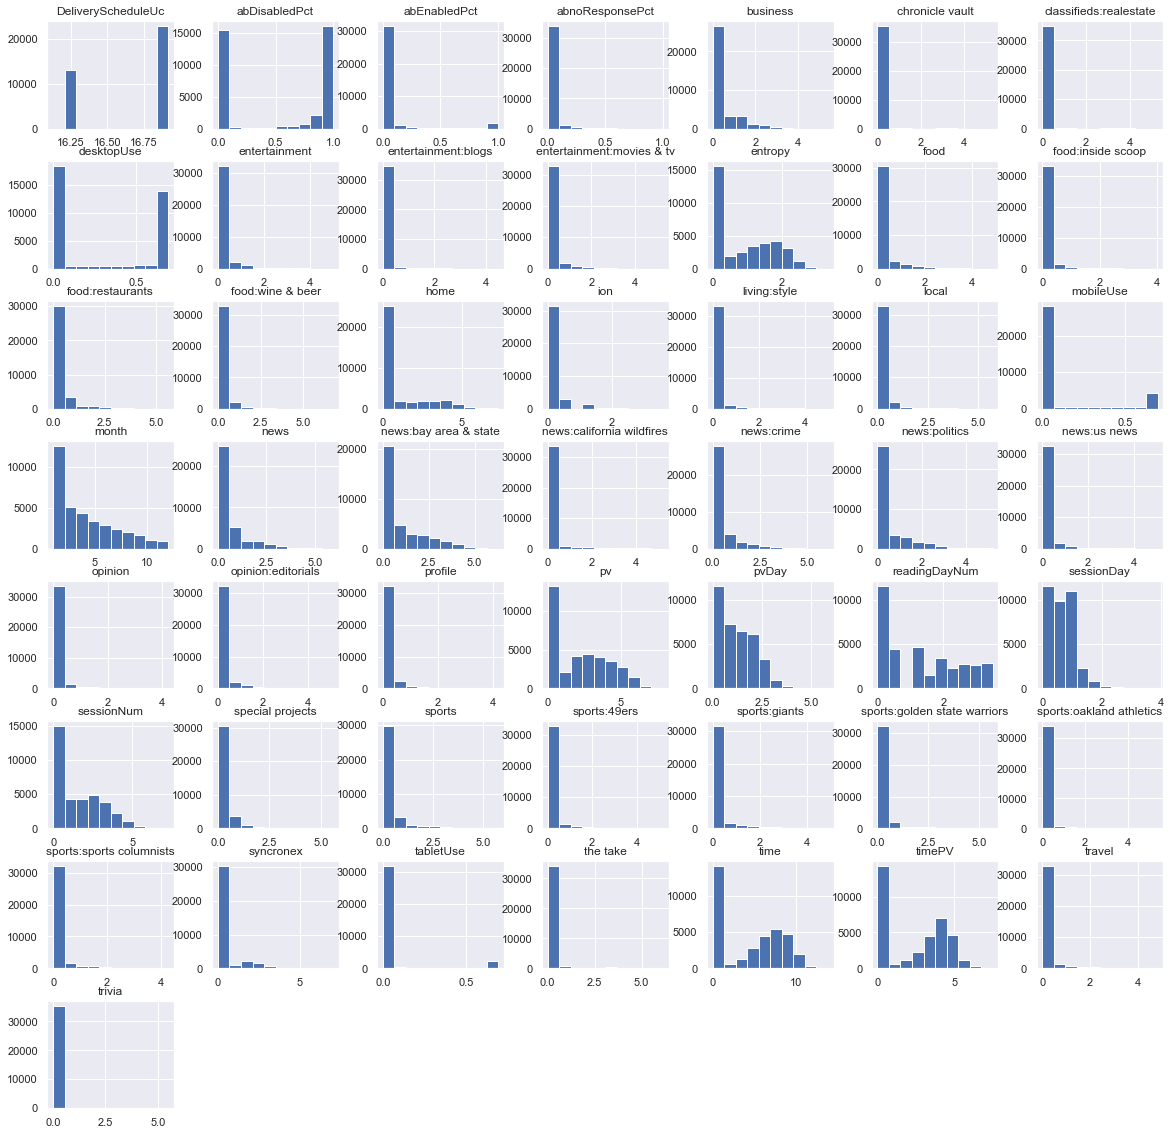

In [22]:
train_continuous[continuous[0:50]].hist(figsize=(20,20))
plt.show()

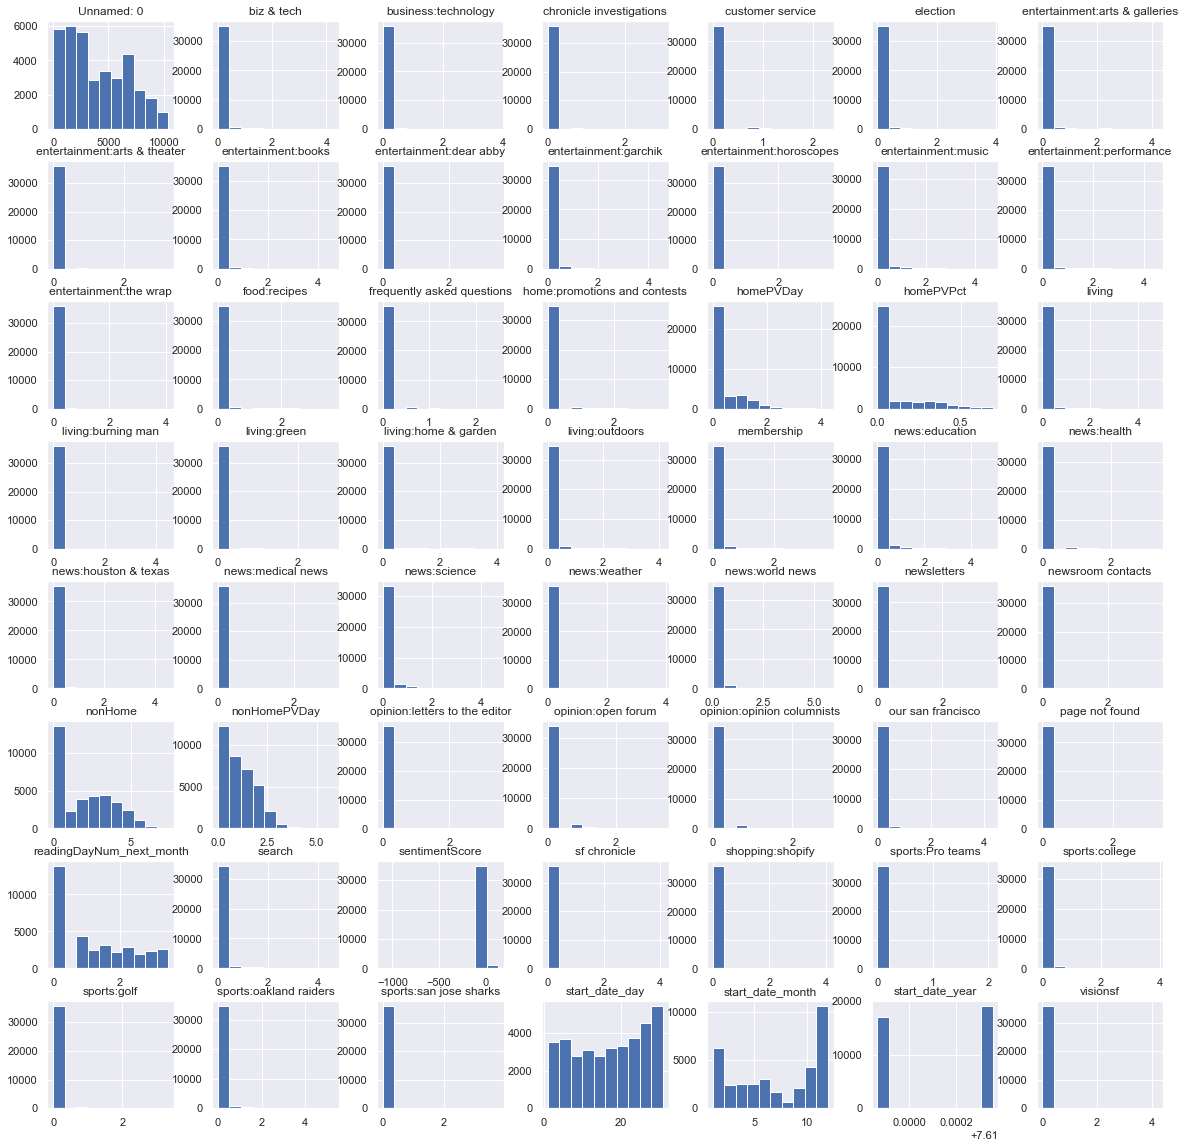

In [23]:
train_continuous[continuous[51:]].hist(figsize=(20,20))
plt.show()

In [24]:
# from feature_engine.discretisers import EqualFrequencyDiscretiser
# disc = EqualFrequencyDiscretiser(q=10, variables = continuous)
# disc.fit(train_continuous)
# # transform train and text
# train_continuous = disc.transform(train_continuous).copy()
# test_continuous = disc.transform(test_continuous).copy()

In [25]:
train_continuous.describe()

,abDisabledPct,abEnabledPct,abnoResponsePct,entropy,Unnamed: 0,month,sentimentScore,start_date_month,start_date_day,DeliveryScheduleUc,time,pv,readingDayNum,sessionNum,timePV,pvDay,sessionDay,mobileUse,desktopUse,tabletUse,home,news:bay area & state,syncronex,news,news:crime,news:politics,business,sports,sports:golden state warriors,sports:giants,food:restaurants,the take,food,classifieds:realestate,living:style,special projects,entertainment,local,news:california wildfires,sports:49ers,trivia,chronicle vault,sports:sports columnists,travel,entertainment:movies & tv,food:wine & beer,news:us news,opinion:editorials,sports:oakland athletics,ion,food:inside scoop,opinion,profile,entertainment:blogs,business:net worth - kathleen pender,news:science,entertainment:music,search,news:world news,our san francisco,living,sports:college,news:education,sports:oakland raiders,opinion:open forum,entertainment:garchik,living:outdoors,entertainment:performance,entertainment:arts & galleries,biz & tech,home:promotions and contests,membership,food:recipes,opinion:opinion columnists,entertainment:books,living:home & garden,election,news:houston & texas,frequently asked questions,customer service,sports:golf,news:health,newsletters,opinion:letters to the editor,business:technology,news:weather,shopping:shopify,living:burning man,sports:san jose sharks,visionsf,living:green,page not found,sf chronicle,news:medical news,entertainment:horoscopes,chronicle investigations,entertainment:arts & theater,entertainment:dear abby,entertainment:the wrap,newsroom contacts,sports:Pro teams,nonHome,homePVPct,homePVDay,nonHomePVDay,readingDayNum_next_month,start_date_year
count,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000
mean,0.526006,0.079186,0.020595,0.855621,3963.389737,4.242065,-6.028415,7.150778,16.759321,16.661224,4.364509,2.172315,1.318033,1.565034,2.338960,1.138605,0.639929,0.117815,0.306242,0.060419,0.960578,0.889578,0.381715,0.477055,0.357930,0.408110,0.368505,0.259405,0.171543,0.192876,0.227984,0.105640,0.204373,0.073648,0.121836,0.180982,0.138372,0.119853,0.095862,0.119818,0.050465,0.046992,0.136277,0.114029,0.114127,0.099700,0.104596,0.112123,0.069480,0.121986,0.089998,0.079094,0.105724,0.051426,0.100454,0.079696,0.062587,0.059440,0.043653,0.048248,0.037498,0.050751,0.048992,0.042304,0.058374,0.042060,0.042664,0.036412,0.031164,0.029596,0.040627,0.039929,0.029624,0.036776,0.027280,0.014634,0.024921,0.020402,0.018121,0.020298,0.011858,0.013335,0.011128,0.009709,0.007628,0.005446,0.003552,0.001523,0.006160,0.004435,0.007387,0.006502,0.004731,0.004748,0.001762,0.004855,0.003252,0.003027,0.003659,0.002204,0.002595,2.008833,0.096467,

In [26]:

X_train_scaled = train_continuous.copy()
X_test_scaled = test_continuous.copy()

for var in continuous:
    X_train_scaled[var] = (train_continuous[var] - min(train_continuous[var]))/(max(train_continuous[var])-min(train_continuous[var]))
    X_test_scaled[var] = (test_continuous[var] - min(train_continuous[var]))/(max(train_continuous[var])-min(train_continuous[var]))

In [27]:
X_train_scaled.describe()

,abDisabledPct,abEnabledPct,abnoResponsePct,entropy,Unnamed: 0,month,sentimentScore,start_date_month,start_date_day,DeliveryScheduleUc,time,pv,readingDayNum,sessionNum,timePV,pvDay,sessionDay,mobileUse,desktopUse,tabletUse,home,news:bay area & state,syncronex,news,news:crime,news:politics,business,sports,sports:golden state warriors,sports:giants,food:restaurants,the take,food,classifieds:realestate,living:style,special projects,entertainment,local,news:california wildfires,sports:49ers,trivia,chronicle vault,sports:sports columnists,travel,entertainment:movies & tv,food:wine & beer,news:us news,opinion:editorials,sports:oakland athletics,ion,food:inside scoop,opinion,profile,entertainment:blogs,business:net worth - kathleen pender,news:science,entertainment:music,search,news:world news,our san francisco,living,sports:college,news:education,sports:oakland raiders,opinion:open forum,entertainment:garchik,living:outdoors,entertainment:performance,entertainment:arts & galleries,biz & tech,home:promotions and contests,membership,food:recipes,opinion:opinion columnists,entertainment:books,living:home & garden,election,news:houston & texas,frequently asked questions,customer service,sports:golf,news:health,newsletters,opinion:letters to the editor,business:technology,news:weather,shopping:shopify,living:burning man,sports:san jose sharks,visionsf,living:green,page not found,sf chronicle,news:medical news,entertainment:horoscopes,chronicle investigations,entertainment:arts & theater,entertainment:dear abby,entertainment:the wrap,newsroom contacts,sports:Pro teams,nonHome,homePVPct,homePVDay,nonHomePVDay,readingDayNum_next_month,start_date_year
count,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000,36073.000000
mean,0.526006,0.079186,0.020595,0.257241,0.380049,0.294733,0.888866,0.559162,0.525311,0.675691,0.316186,0.275686,0.376957,0.214794,0.312176,0.194978,0.164805,0.169970,0.441813,0.087166,0.131505,0.141517,0.054163,0.080134,0.058938,0.078674,0.068380,0.045069,0.030146,0.039501,0.040723,0.017206,0.041791,0.014022,0.024447,0.032285,0.027507,0.021013,0.018270,0.023148,0.009160,0.008804,0.031970,0.023617,0.021644,0.014788,0.020793,0.021807,0.012915,0.033783,0.022358,0.018745,0.025327,0.011486,0.018532,0.016988,0.013190,0.012935,0.007713,0.011141,0.007753,0.012908,0.009988,0.008000,0.017336,0.009194,0.010259,0.008033,0.007412,0.006966,0.011723,0.010683,0.008144,0.012724,0.005899,0.003636,0.006403,0.004491,0.007293,0.008815,0.003559,0.003960,0.003130,0.002801,0.001981,0.001399,0.000875,0.000341,0.001628,0.001055,0.002556,0.001996,0.001156,0.001559,0.000504,0.001621,0.000998,0.000866,0.000894,0.000625,0.001248,0.270321,0.139172,0.0859

In [28]:
type(X_train_scaled)

pandas.core.frame.DataFrame

In [29]:
# X_train_scaled = pd.DataFrame(data=X_train_scaled[1:,1:],    # values
#                                           index=X_train_scaled[1:,0],    # 1st column as index
#                                           columns=X_train_scaled[0,1:])
# X_train_scaled.head()

In [30]:
X_train = train_dummies
X_test = test_dummies
for var in continuous:
    X_train[var] = X_train_scaled[var]
    X_test[var] = X_test_scaled[var]
for var in discrete:
    X_train[var] = train[var]
    X_test[var] = test[var]

X_train = X_train.drop(['churn_next_month','readingDayNum_next_month','train'], axis=1).copy()
X_test = X_test.drop(['churn_next_month','readingDayNum_next_month','train'], axis=1).copy()
X_train.head()

,ProductUc_SfChron,SubscriptionType_D,SubscriptionType_P,Description_Fri-Sun,Description_Mon-Sat,Description_Mon-Sun,Description_Sun,Description_Universal Digital Access,Description_Wed-Sun,Description_eEdition,Description_iPad,device_type_Desktop,device_type_Missing,device_type_Mobile Phone,device_type_Tablet,referrer_type_Inside Your Site,referrer_type_NoRead,referrer_type_Other Web Sites,referrer_type_Others,referrer_type_Search Engines,referrer_type_Social Networks,referrer_type_Typed/Bookmarked,first_hit_referrer_type_NoRead,first_hit_referrer_type_Other Web Sites,first_hit_referrer_type_Others,first_hit_referrer_type_Search Engines,first_hit_referrer_type_Social Networks,first_hit_referrer_type_Typed/Bookmarked,geo_city_Missing,geo_city_Rare,geo_city_berkeley,geo_city_oakland,geo_city_san francisco,geo_city_san jose,geo_city_san rafael,geo_region_California,geo_region_Missing,geo_region_New York,geo_region_Rare,geo_country_Missing,geo_country_Rare,geo_country_United States,ad_block_status_Missing,ad_block_status_abDisabled,ad_block_status_abEnabled,ad_block_status_noResponse,season_Fall,season_Spring,season_Summer,season_Winter,DeliveryScheduleUc,month,time,pv,readingDayNum,sessionNum,timePV,pvDay,sessionDay,entropy,mobileUse,desktopUse,tabletUse,abDisabledPct,abEnabledPct,abnoResponsePct,home,news:bay area & state,syncronex,news,news:crime,news:politics,business,sports,sports:golden state warriors,sports:giants,food:restaurants,the take,food,classifieds:realestate,living:style,special projects,entertainment,local,news:california wildfires,sports:49ers,trivia,chronicle vault,sports:sports columnists,travel,entertainment:movies & tv,food:wine & beer,news:us news,opinion:editorials,sports:oakland athletics,ion,food:inside scoop,opinion,profile,entertainment:blogs,business:net worth - kathleen pender,news:science,entertainment:music,search,news:world news,our san francisco,living,sports:college,news:education,sports:oakland raiders,opinion:open forum,entertainment:garchik,living:outdoors,entertainment:performance,entertainment:arts & galleries,biz & tech,home:promotions and contests,membership,food:recipes,opinion:opinion columnists,entertainment:books,living:home & garden,election,news:houston & texas,frequently asked questions,customer service,sports:golf,news:health,newsletters,opinion:letters to the editor,business:technology,news:weather,shopping:shopify,living:burning man,sports:san jose sharks,visionsf,living:green,page not found,sf chronicle,news:medical news,entertainment:horoscopes,chronicle investigations,entertainment:arts & theater,entertainment:dear abby,entertainment:the wrap,newsroom contacts,sports:Pro teams,nonHome,homePVPct,homePVDay,nonHomePVDay,sentimentScore,Unnamed: 0,start_date_year,start_date_month,start_date_day,multiStop,leftCensored,censorDaysL,churn,isEngage,adBlock
0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1.0,0.272727,0.423617,0.304314,0.198240,0.150780,0.476548,0.410622,0.282933,0.283616,0.000000,1.000000,0.0,1.00,0.00,0.0,0.220335,0.000000,0.254240,0.116432,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.261853,0.485427,0.379337,0.333222,0.893755,0.000000,1.0,0.181818,0.3,1,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1.0,0.181818,0.599526,0.443738,0.396480,0.245912,0.643015,0.420698,0.252600,0.208121,0.000000,1.000000,0.0,1.00,0.00,0.0,0.300804,0.000000,0.450947,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191959,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [31]:
# np.any(np.isnan(logReadingDayNum_next_month_test.any()))
# np.all(np.isfinite(logReadingDayNum_next_month_test.all()))
np.where(X_test.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [32]:
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)
# pd.set_option('display.max_columns', None)
# X_train.head()
# X_train.describe()

In [33]:
# create variable y
churn_next_month_train = train['churn_next_month']
churn_next_month_test = test['churn_next_month']

logReadingDayNum_next_month_train = np.log(1.0 + train['readingDayNum_next_month'])
logReadingDayNum_next_month_test = np.log(1.0 + test['readingDayNum_next_month'])
# logReadingDayNum_next_month_train = 1.0 - (1.0 / (1.0 + train['readingDayNum_next_month']))
# logReadingDayNum_next_month_test = 1.0 - (1.0 / (1.0 + test['readingDayNum_next_month']))

rock_star_next_month_train = np.where(train['readingDayNum_next_month'] >= 20, 1, 0)
rock_star_next_month_test = np.where(test['readingDayNum_next_month'] >= 20, 1, 0)

soft_churn_next_month = np.where(train['readingDayNum_next_month'] <= 2, 1, 0)
soft_churn_next_test = np.where(test['readingDayNum_next_month'] <= 2, 1, 0)

In [34]:
print(train_dummies.shape)
print(test_dummies.shape)
print(X_train.shape)
print(X_test.shape)
print(churn_next_month_train.shape)
print(churn_next_month_test.shape)
print(logReadingDayNum_next_month_train.shape)
print(logReadingDayNum_next_month_test.shape)
print(rock_star_next_month_train.shape)
print(rock_star_next_month_test.shape)
print(soft_churn_next_month.shape)
print(soft_churn_next_test.shape)
print(type(churn_next_month_train))
print(type(logReadingDayNum_next_month_train))
print(type(soft_churn_next_month))
print(type(rock_star_next_month_train))

(36073, 165)
(17886, 165)
(36073, 162)
(17886, 162)
(36073,)
(17886,)
(36073,)
(17886,)
(36073,)
(17886,)
(36073,)
(17886,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [35]:
# # output csv file for modeling
# X_train.to_csv('X_train.csv')
# X_test.to_csv('X_test.csv')

### predictive modeling

##### 1. Training and validation

since we have tons of data, Train-test split would be enough, no need for cross validation. 

Waiting for idtrain.csv to asign tranning and testing ids. can use random Train-test split before we get it.

##### 2. modeling methods

(0) Linear regression/ logistic regerssion as baseline

(1) Lasso (down to 10-20 variables) 

(2) Random forest (down to 10-20 variables) 

(3) Feature selection by PCA (down to 10-15 variables) + NN

(4) Feature selection by Lasso + NN

(5) Feature selection by Random forest + NN

##### 3. Modeling:

Q1: predict churn_next_month (AUC)

Q2: predict rock_star_next_month (AUC)

Q3: predict log_readingDayNum_next_month (R square)

##### 4. other tasks and questions

Q4: maybe 2 classification
(1) classification: is easier to explain to business people
(2) more actionable; 
(3) clear objective(AUC) 

Q5: need to be discussed. The architecture and tranning? Number of hidden layers? (try 1-3?)

### Prediction of  log_readingDayNum_next_month (R square)

In [36]:

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [62]:
regr = linear_model.LinearRegression()
regr.fit(X_train, logReadingDayNum_next_month_train)
logReadingDayNum_next_month_pred = regr.predict(X_test)
print('Predict logReadingDayNum_next_month using LinearRegression: ')
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))

Predict logReadingDayNum_next_month using LinearRegression: 
Mean squared error: 2193351541948687103033344.00
Coefficient of determination: -1647821096874314588749824.00


In [37]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Fit on training set only.
# scaler.fit(X_train)
# # Apply transform to both the training set and the test set.
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [63]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train_pca, logReadingDayNum_next_month_train)
logReadingDayNum_next_month_pred = regr.predict(X_test_pca)
print('Prediction logReadingDayNum_next_month using pca.95: ')
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))

Prediction logReadingDayNum_next_month using pca.95: 
Mean squared error: 0.53
Coefficient of determination: 0.60


Try only 2 Variables, the regression works...

In [64]:
X_train1 = X_train[['readingDayNum','time']]
X_test1 = X_test[['readingDayNum','time']]

# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit(X_train1, logReadingDayNum_next_month_train)
logReadingDayNum_next_month_pred = regr.predict(X_test1)

# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Prediction logReadingDayNum_next_month using only readingDayNum and time')
print('Mean squared error: %.2f'
      % mean_squared_error(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))

Prediction logReadingDayNum_next_month using only readingDayNum and time
Mean squared error: 0.44
Coefficient of determination: 0.67


Try only 2 categorical variables, the regression seems works badly...

In [40]:
train_dummies1 = train_dummies.drop(['churn_next_month'], axis=1).copy()
test_dummies1 = test_dummies.drop(['churn_next_month'], axis=1).copy()

model = LogisticRegression(max_iter=1000, solver="lbfgs")
model.fit(train_dummies1, churn_next_month_train)

predictions = model.predict(test_dummies1)
print('AUC: ', roc_auc_score(churn_next_month_test, predictions))

AUC:  0.6354880816233661


In [41]:
pd.set_option('display.max_columns', None)
X_train.head()

,ProductUc_SfChron,SubscriptionType_D,SubscriptionType_P,Description_Fri-Sun,Description_Mon-Sat,Description_Mon-Sun,Description_Sun,Description_Universal Digital Access,Description_Wed-Sun,Description_eEdition,Description_iPad,device_type_Desktop,device_type_Missing,device_type_Mobile Phone,device_type_Tablet,referrer_type_Inside Your Site,referrer_type_NoRead,referrer_type_Other Web Sites,referrer_type_Others,referrer_type_Search Engines,referrer_type_Social Networks,referrer_type_Typed/Bookmarked,first_hit_referrer_type_NoRead,first_hit_referrer_type_Other Web Sites,first_hit_referrer_type_Others,first_hit_referrer_type_Search Engines,first_hit_referrer_type_Social Networks,first_hit_referrer_type_Typed/Bookmarked,geo_city_Missing,geo_city_Rare,geo_city_berkeley,geo_city_oakland,geo_city_san francisco,geo_city_san jose,geo_city_san rafael,geo_region_California,geo_region_Missing,geo_region_New York,geo_region_Rare,geo_country_Missing,geo_country_Rare,geo_country_United States,ad_block_status_Missing,ad_block_status_abDisabled,ad_block_status_abEnabled,ad_block_status_noResponse,season_Fall,season_Spring,season_Summer,season_Winter,DeliveryScheduleUc,month,time,pv,readingDayNum,sessionNum,timePV,pvDay,sessionDay,entropy,mobileUse,desktopUse,tabletUse,abDisabledPct,abEnabledPct,abnoResponsePct,home,news:bay area & state,syncronex,news,news:crime,news:politics,business,sports,sports:golden state warriors,sports:giants,food:restaurants,the take,food,classifieds:realestate,living:style,special projects,entertainment,local,news:california wildfires,sports:49ers,trivia,chronicle vault,sports:sports columnists,travel,entertainment:movies & tv,food:wine & beer,news:us news,opinion:editorials,sports:oakland athletics,ion,food:inside scoop,opinion,profile,entertainment:blogs,business:net worth - kathleen pender,news:science,entertainment:music,search,news:world news,our san francisco,living,sports:college,news:education,sports:oakland raiders,opinion:open forum,entertainment:garchik,living:outdoors,entertainment:performance,entertainment:arts & galleries,biz & tech,home:promotions and contests,membership,food:recipes,opinion:opinion columnists,entertainment:books,living:home & garden,election,news:houston & texas,frequently asked questions,customer service,sports:golf,news:health,newsletters,opinion:letters to the editor,business:technology,news:weather,shopping:shopify,living:burning man,sports:san jose sharks,visionsf,living:green,page not found,sf chronicle,news:medical news,entertainment:horoscopes,chronicle investigations,entertainment:arts & theater,entertainment:dear abby,entertainment:the wrap,newsroom contacts,sports:Pro teams,nonHome,homePVPct,homePVDay,nonHomePVDay,sentimentScore,Unnamed: 0,start_date_year,start_date_month,start_date_day,multiStop,leftCensored,censorDaysL,churn,isEngage,adBlock
0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1.0,0.272727,0.423617,0.304314,0.198240,0.150780,0.476548,0.410622,0.282933,0.283616,0.000000,1.000000,0.0,1.00,0.00,0.0,0.220335,0.000000,0.254240,0.116432,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.261853,0.485427,0.379337,0.333222,0.893755,0.000000,1.0,0.181818,0.3,1,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1.0,0.181818,0.599526,0.443738,0.396480,0.245912,0.643015,0.420698,0.252600,0.208121,0.000000,1.000000,0.0,1.00,0.00,0.0,0.300804,0.000000,0.450947,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191959,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [42]:
X_train1 = X_train[['readingDayNum','time','sessionNum','sessionDay','pvDay',
                    'season_Fall','season_Spring','season_Summer','season_Winter'
                   ]]
X_test1 = X_test[['readingDayNum','time','sessionNum','sessionDay','pvDay',
                    'season_Fall','season_Spring','season_Summer','season_Winter'
                   ]]

In [43]:
# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit(X_train1, logReadingDayNum_next_month_train)
logReadingDayNum_next_month_pred = regr.predict(X_test1)

# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))

Mean squared error: 0.41
Coefficient of determination: 0.69


In [115]:
clf = linear_model.Lasso(alpha=0.002, random_state=16889)
clf.fit(X_train, logReadingDayNum_next_month_train)
print('Prediction logReadingDayNum_next_month using Lasso:')
# print(clf.coef_)
print(clf.intercept_)
logReadingDayNum_next_month_pred = clf.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))
cols = []

important_features = []
for i in X_train.columns:
    cols.append(i)    
l = list(zip(clf.coef_, cols))
for i in l:
     if abs(float(i[0]))>= 0.0000000001:
        important_features.append(i[1])  
        print(i)
print(important_features)

Prediction logReadingDayNum_next_month using Lasso:
0.5595750702491646
Mean squared error: 0.48
Coefficient of determination: 0.64
(0.05164365870071349, 'SubscriptionType_D')
(0.012163784627730049, 'device_type_Missing')
(-0.04644451090352619, 'referrer_type_Inside Your Site')
(0.008297228081363727, 'referrer_type_NoRead')
(0.012937335718097001, 'first_hit_referrer_type_Others')
(-0.06065658341426954, 'first_hit_referrer_type_Search Engines')
(-0.03927363707478465, 'geo_city_Rare')
(-0.008144012681383114, 'geo_country_United States')
(0.13275661380280002, 'ad_block_status_Missing')
(-0.31015441460376386, 'season_Fall')
(0.02177928064971248, 'season_Spring')
(0.0300651808284978, 'season_Summer')
(-0.03331344269937783, 'season_Winter')
(-0.28437832086877185, 'month')
(3.023293130085209, 'readingDayNum')
(0.0066135717057516025, 'mobileUse')
(-0.0046355859532158546, 'desktopUse')
(-0.026982738334764153, 'abDisabledPct')
(0.11765668022180058, 'home')
(0.17139174050222863, 'news:bay area & s

In [101]:
coef_dict = {}
for coef, feat in zip(clf.coef_,cols):
    coef_dict[feat] = coef
sorted_x = dict(sorted(coef_dict.items(), key=lambda kv: abs(kv[1]), reverse=True)[:20])
type(sorted_x)

dict

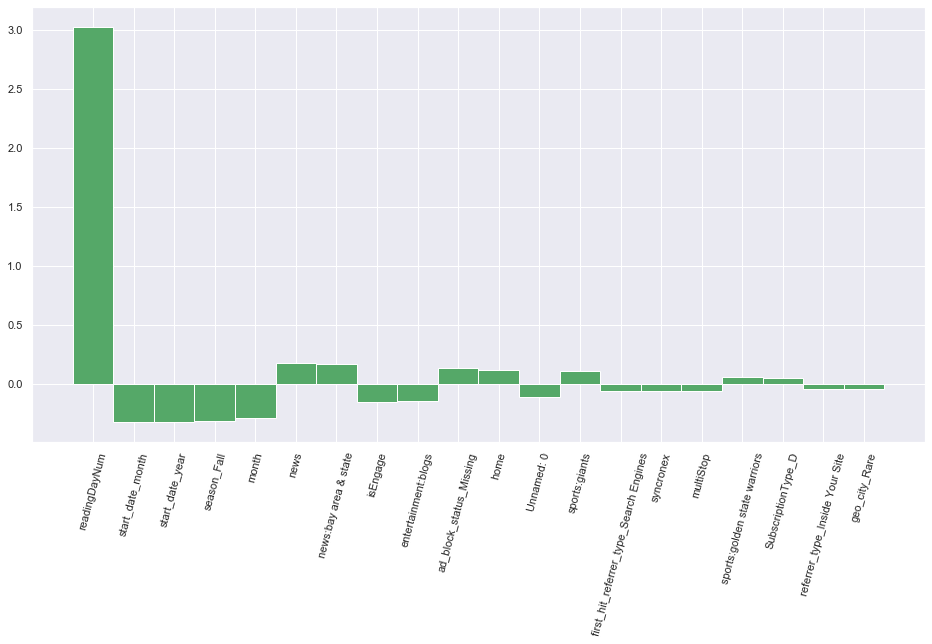

In [114]:
# r = pd.DataFrame(columns=['Feature','Importance'])
# ncomp = 15
# r['Feature'] = feat_labels = Features.columns
# r['Importance'] = model.feature_importances_
# r.set_index(r['Feature'], inplace=True)
# ax = r.sort_values('Importance', ascending=False)[:ncomp].plot.bar(width=0.9, legend=False, figsize=(15,8))
# ax.set_ylabel('Relative Importance')
fig = plt.gcf()
fig.set_size_inches(16,8, forward = False)
plt.bar(sorted_x.keys(), sorted_x.values(), width = 1, color='g')
plt.xticks(rotation = 75)
plt.show()

In [118]:
clf = MLPRegressor(solver='adam',activation='tanh', alpha=0.02,learning_rate = 'adaptive', 
                   hidden_layer_sizes=(20,6),max_iter = 1000, random_state=16889, 
                   early_stopping = False)
clf.fit(X_train[important_features], logReadingDayNum_next_month_train)
predictions = clf.predict(X_test[important_features])
# print(clf.coefs_)
print('Prediction logReadingDayNum_next_month using Lasso_filtered_features + NN:')
print('r2_score: ', r2_score(logReadingDayNum_next_month_test, predictions))

Prediction logReadingDayNum_next_month using Lasso_filtered_features + NN:
r2_score:  0.7221745044745449


In [119]:
clf = MLPRegressor(solver='adam',activation='identity', alpha=0.5,learning_rate = 'adaptive', 
                   hidden_layer_sizes=(8,3),max_iter = 1000, random_state=16889, 
                   early_stopping = False)
clf.fit(X_train_pca, logReadingDayNum_next_month_train)
predictions = clf.predict(X_test_pca)
print('Prediction logReadingDayNum_next_month using PCA_filtered_features + NN:')
print('r2_score: ', r2_score(logReadingDayNum_next_month_test, predictions))

Prediction logReadingDayNum_next_month using PCA_filtered_features + NN:
r2_score:  0.5995487227078972


In [47]:
# X_train_pca.shape

(36073, 31)

In [120]:
lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth= 8, learning_rate=0.01, 
            n_estimators=1000, max_bin=255, subsample_for_bin=50000, 
                     reg_alpha=0.25, reg_lambda=0.3, seed=1108)
lgbm.fit(X_train[important_features], logReadingDayNum_next_month_train)
predictions = lgbm.predict(X_test[important_features])
# print(clf.coefs_)
print('Prediction logReadingDayNum_next_month using Lasso_filtered_features + LGBM:')
print('r2_score: ', r2_score(logReadingDayNum_next_month_test, predictions))

Prediction logReadingDayNum_next_month using Lasso_filtered_features + LGBM:
r2_score:  0.7234422408049622


.

C:\Users\84562\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 25 iterations, alpha=1.428e-02, previous alpha=8.784e-03, with an active set of 18 regressors.
  ConvergenceWarning)


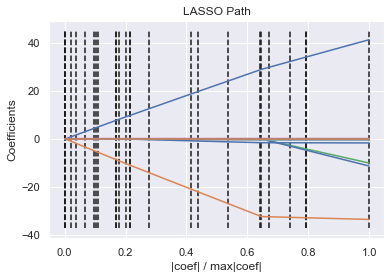

In [49]:
# _, _, coefs = linear_model.lars_path(X_train.to_numpy(), churn_next_month_train.to_numpy(), method='lasso', verbose=True)

# xx = np.sum(np.abs(coefs.T), axis=1)
# xx /= xx[-1]

# plt.plot(xx, coefs.T)
# ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
# plt.xlabel('|coef| / max|coef|')
# plt.ylabel('Coefficients')
# plt.title('LASSO Path')
# plt.axis('tight')
# plt.show()

In [121]:
regr = RandomForestRegressor(max_depth=5, random_state=1108,
                              n_estimators=100)
regr.fit(X_train[important_features], logReadingDayNum_next_month_train)
logReadingDayNum_next_month_pred = regr.predict(X_test[important_features])

print('Prediction logReadingDayNum_next_month using Lasso_filtered_features + RandomForest:')
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))

Prediction logReadingDayNum_next_month using Lasso_filtered_features + RandomForest:
Mean squared error: 0.39
Coefficient of determination: 0.71


In [127]:
regr = RandomForestRegressor(max_depth=10, random_state=1108,
                              n_estimators=100)
regr.fit(X_train, logReadingDayNum_next_month_train)
logReadingDayNum_next_month_pred = regr.predict(X_test)

print('Prediction logReadingDayNum_next_month RandomForest:')
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))

Prediction logReadingDayNum_next_month RandomForest:
Mean squared error: 0.67
Coefficient of determination: 0.50


In [126]:
regr.feature_importances_

array([0.53874222, 0.00425278, 0.00631788, 0.00486349, 0.14536898,
       0.005496  , 0.01932668, 0.00407325, 0.00480496, 0.00521789,
       0.00352595, 0.03852267, 0.00627216, 0.01432485, 0.09364018,
       0.0179631 , 0.01329554, 0.00277419, 0.00496663, 0.00369592,
       0.00390804, 0.00989408, 0.00350033, 0.00882425, 0.00475485,
       0.00408916, 0.00463106, 0.00436186, 0.00375864, 0.00444373,
       0.01038867])

In [122]:
regr = RandomForestRegressor(max_depth=10, random_state=1108,
                              n_estimators=100)
regr.fit(X_train_pca, logReadingDayNum_next_month_train)
logReadingDayNum_next_month_pred = regr.predict(X_test_pca)
print('Prediction logReadingDayNum_next_month using PCA_filtered_features + RandomForest:')
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(logReadingDayNum_next_month_test, logReadingDayNum_next_month_pred))

Prediction logReadingDayNum_next_month using PCA_filtered_features + RandomForest:
Mean squared error: 0.78
Coefficient of determination: 0.41


### Prediction of  churn_next_month (AUC)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = LogisticRegression(max_iter=1000, solver="lbfgs")
model.fit(X_train, churn_next_month_train)

predictions = model.predict(X_test)
print('Prediction churn_next_month using LogisticRegression:')
print('AUC: ', roc_auc_score(churn_next_month_test, predictions))

Prediction churn_next_month using LogisticRegression:
AUC:  0.6432930993139601


In [129]:
clf = LogisticRegression(penalty="l1",solver='liblinear', C = 8, random_state=123)
clf.fit(X_train, churn_next_month_train)
# print(clf.coef_)
# print(clf.intercept_)
predictions = clf.predict(X_test)
print('Prediction churn_next_month using Lasso + LogisticRegression:')
print('AUC: ', roc_auc_score(churn_next_month_test, predictions))

Prediction churn_next_month using Lasso + LogisticRegression:
AUC:  0.847646619227533


In [130]:
cols = []

important_features = []
for i in X_train.columns:
    cols.append(i) 
l = list(zip(clf.coef_.tolist()[0], cols))
for i in l:
     if abs(float(i[0]))>= 0.1:
        important_features.append(i[1])  
        print(i)
print(important_features)
print(len(important_features))

(-1.928339222723412, 'ProductUc_SfChron')
(-0.8942006239410282, 'SubscriptionType_D')
(-2.075723883069297, 'SubscriptionType_P')
(-0.1689104821005402, 'Description_Mon-Sun')
(-0.12708170777455174, 'Description_Sun')
(4.169794987001068, 'Description_Wed-Sun')
(-0.6067111581343703, 'Description_eEdition')
(-0.46827371500583964, 'device_type_Desktop')
(-0.4241168830037113, 'device_type_Missing')
(-0.8775051141220199, 'device_type_Mobile Phone')
(-0.36915692279839674, 'referrer_type_NoRead')
(-0.312772904104335, 'referrer_type_Search Engines')
(-0.23650867869974682, 'referrer_type_Typed/Bookmarked')
(-0.7713478755534773, 'first_hit_referrer_type_NoRead')
(-0.5233330837102068, 'first_hit_referrer_type_Others')
(-0.33461100638134833, 'first_hit_referrer_type_Social Networks')
(-0.18487123443093934, 'first_hit_referrer_type_Typed/Bookmarked')
(-1.0696453376826451, 'geo_city_Missing')
(-0.10416250315745802, 'geo_city_oakland')
(0.38988959554603864, 'geo_city_san jose')
(-0.1673711983147418, 'g

In [150]:
# Features = X_train[['ProductUc_SfChron', 'SubscriptionType_D', 'SubscriptionType_P', 'Description_Mon-Sun', 'Description_Sun', 'Description_Wed-Sun', 'Description_eEdition', 'device_type_Desktop', 'device_type_Missing', 'device_type_Mobile Phone', 'referrer_type_Inside Your Site', 'referrer_type_NoRead', 'referrer_type_Others', 'referrer_type_Search Engines', 'referrer_type_Typed/Bookmarked', 'first_hit_referrer_type_NoRead', 'first_hit_referrer_type_Others', 'first_hit_referrer_type_Search Engines', 'first_hit_referrer_type_Social Networks', 'first_hit_referrer_type_Typed/Bookmarked', 'geo_city_Missing', 'geo_city_Rare', 'geo_city_berkeley', 'geo_city_oakland', 'geo_city_san francisco', 'geo_city_san jose', 'geo_city_san rafael', 'geo_region_California', 'geo_region_Missing', 'geo_region_Rare', 'geo_country_Missing', 'geo_country_Rare', 'geo_country_United States', 'ad_block_status_Missing', 'ad_block_status_abDisabled', 'ad_block_status_abEnabled', 'ad_block_status_noResponse', 'season_Fall', 'season_Spring', 'season_Winter', 'DeliveryScheduleUc', 'month', 'time', 'pv', 'readingDayNum', 'timePV', 'sessionDay', 'entropy', 'mobileUse', 'desktopUse', 'tabletUse', 'abDisabledPct', 'abEnabledPct', 'abnoResponsePct', 'home', 'news:bay area & state', 'syncronex', 'news', 'news:crime', 'news:politics', 'business', 'sports', 'sports:golden state warriors', 'sports:giants', 'food:restaurants', 'the take', 'food', 'classifieds:realestate', 'living:style', 'special projects', 'entertainment', 'local', 'news:california wildfires', 'trivia', 'chronicle vault', 'sports:sports columnists', 'travel', 'entertainment:movies & tv', 'food:wine & beer', 'news:us news', 'sports:oakland athletics', 'ion', 'food:inside scoop', 'opinion', 'profile', 'entertainment:blogs', 'news:science', 'entertainment:music', 'search', 'news:world news', 'our san francisco', 'living', 'sports:college', 'news:education', 'sports:oakland raiders', 'opinion:open forum', 'entertainment:garchik', 'living:outdoors', 'entertainment:performance', 'entertainment:arts & galleries', 'home:promotions and contests', 'membership', 'opinion:opinion columnists', 'entertainment:books', 'living:home & garden', 'election', 'news:houston & texas', 'frequently asked questions', 'sports:golf', 'news:health', 'newsletters', 'opinion:letters to the editor', 'news:weather', 'shopping:shopify', 'sports:san jose sharks', 'visionsf', 'living:green', 'page not found', 'sf chronicle', 'news:medical news', 'chronicle investigations', 'entertainment:arts & theater', 'entertainment:dear abby', 'newsroom contacts', 'sports:Pro teams', 'nonHome', 'homePVPct', 'homePVDay', 'nonHomePVDay', 'sentimentScore', 'Unnamed: 0', 'start_date_year', 'start_date_month', 'start_date_day', 'multiStop', 'isEngage', 'adBlock']]
# r = pd.DataFrame(columns=['Feature','Importance'])
# ncomp = 15
# r['Feature'] = feat_labels = Features.columns
# r['Importance'] = clf.feature_importances_
# r.set_index(r['Feature'], inplace=True)
# ax = r.sort_values('Importance', ascending=False)[:ncomp].plot.bar(width=0.9, legend=False, figsize=(15,8))
# ax.set_ylabel('Relative Importance')

coef_dict = {}
for coef, feat in zip(clf.coef_[0],cols):
    coef_dict[feat] = coef
sorted_x = dict(sorted(coef_dict.items(), key=lambda kv: abs(kv[1]), reverse=True)[:30])
print(sorted_x)

{'multiStop': 12.112048182223745, 'shopping:shopify': -5.517756362556405, 'nonHome': -5.179670475333364, 'Description_Wed-Sun': 4.169794987001068, 'nonHomePVDay': 3.063555313636389, 'news:california wildfires': 2.9387448405549716, 'geo_country_United States': -2.6347653319716913, 'news:medical news': -2.598404791702985, 'geo_region_Missing': -2.4540468591341518, 'month': 2.432280584223207, 'start_date_year': 2.2009514604938314, 'news:houston & texas': -2.177788793826732, 'geo_country_Rare': -2.154419623512142, 'entertainment:movies & tv': 2.139767209647513, 'SubscriptionType_P': -2.075723883069297, 'isEngage': -2.005305836603079, 'start_date_month': 1.990368341143193, 'sports:oakland raiders': 1.9391971189260484, 'entertainment:dear abby': 1.9376760412451512, 'ProductUc_SfChron': -1.928339222723412, 'readingDayNum': 1.8479613242412156, 'sentimentScore': -1.839542666041301, 'sports:san jose sharks': -1.768400745812951, 'frequently asked questions': 1.7355678633646805, 'entertainment:blo

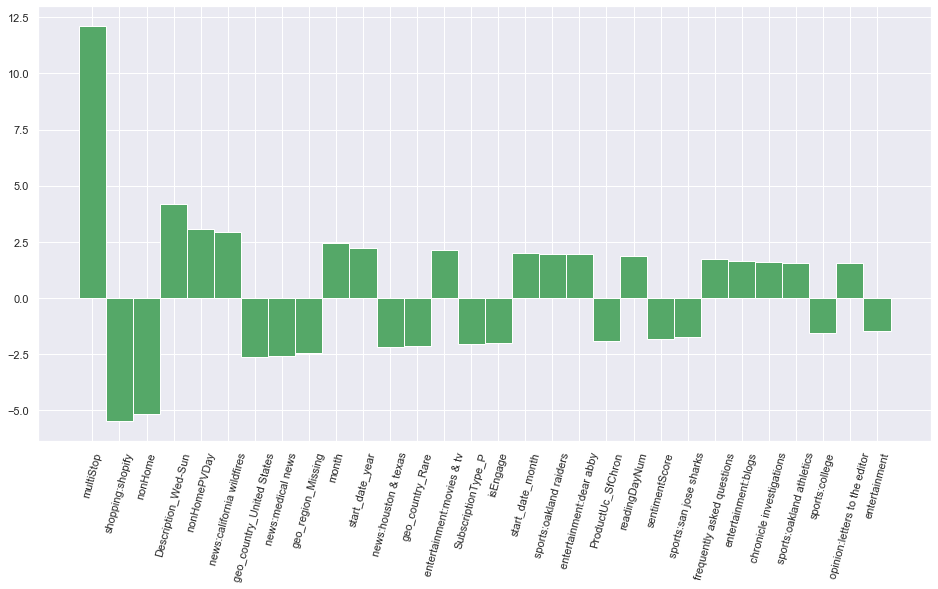

In [151]:
fig = plt.gcf()
fig.set_size_inches(16,8, forward = False)
plt.bar(sorted_x.keys(), sorted_x.values(), width = 1, color='g')
plt.xticks(rotation = 75)
plt.show()

In [154]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth= 50, random_state=1108,
                              n_estimators=100)
model.fit(X_train[important_features], churn_next_month_train)
predictions = model.predict(X_test[important_features])
print('Prediction churn_next_month using Lasso + RandomForest:')
print('AUC: ', roc_auc_score(churn_next_month_test, predictions))

Prediction churn_next_month using Lasso + RandomForest:
AUC:  0.6218245960987457


# !!

In [152]:
from sklearn.neural_network import MLPClassifier
for i in range(1):
    clf = MLPClassifier(solver='adam',activation='tanh', alpha=0.02,learning_rate = 'adaptive', 
                       hidden_layer_sizes=(20,6),max_iter = 1000, random_state=i, 
                       early_stopping = False)
    clf.fit(X_train[important_features], churn_next_month_train)
    predictions = clf.predict(X_test[important_features])
    # print(clf.coefs_)
    print('Prediction churn_next_month using Lasso + NN:')
    print('AUC: ', roc_auc_score(churn_next_month_test, predictions))
# i th trail, AUC:  0.669848806651173
# i th trail, AUC:  0.6794116213046703
# i th trail, AUC:  0.6935822020277536
# i th trail, AUC:  0.7057452160978276
# i th trail, AUC:  0.7044687105012473

Prediction churn_next_month using Lasso + NN:
AUC:  0.7018898954759466


In [ ]:
# (4) Feature selection by Lasso + NN
# (5) Feature selection by Random forest + NN

### Prediction of  rock_star_next_month (AUC)

In [158]:
# (0) Linear regression/ logistic regerssion as baseline
model = LogisticRegression(max_iter=1000, solver="lbfgs")
model.fit(X_train, rock_star_next_month_train)

predictions = model.predict(X_test)
print('Prediction rock_star_next_month using LogisticRegression:')
print('AUC: ', roc_auc_score(rock_star_next_month_test, predictions))

Prediction rock_star_next_month using LogisticRegression:
AUC:  0.7235472236452619


In [159]:
# (1) Lasso (down to 10-20 variables) 
clf = LogisticRegression(penalty="l1",solver='liblinear', C = 10, random_state=123)
clf.fit(X_train, rock_star_next_month_train)
# print(clf.coef_)
print(clf.intercept_)
predictions = clf.predict(X_test)
print('Prediction rock_star_next_month using Lasso + LogisticRegression:')
print('AUC: ', roc_auc_score(rock_star_next_month_test, predictions))

[-0.28746102]
Prediction rock_star_next_month using Lasso + LogisticRegression:
AUC:  0.7409716602370602


In [160]:
cols = []

important_features = []
for i in X_train.columns:
    cols.append(i) 
l = list(zip(clf.coef_.tolist()[0], cols))
for i in l:
     if abs(float(i[0]))>= 0.1:
        important_features.append(i[1])  
        print(i)
print(important_features)
print(len(important_features))

(-0.3188977511859473, 'ProductUc_SfChron')
(-0.12889639515421172, 'SubscriptionType_D')
(-0.47152458472632375, 'SubscriptionType_P')
(-0.4688254587161344, 'Description_Fri-Sun')
(-1.441109315332411, 'Description_iPad')
(0.7935134368008928, 'device_type_Missing')
(-0.15786285588459908, 'device_type_Mobile Phone')
(-0.3166108571848323, 'device_type_Tablet')
(1.334881848315947, 'referrer_type_NoRead')
(0.2617709331837902, 'referrer_type_Others')
(-0.4256281176954803, 'referrer_type_Search Engines')
(-0.15586998587118445, 'referrer_type_Social Networks')
(-0.5036069350582423, 'referrer_type_Typed/Bookmarked')
(0.5396866070467099, 'first_hit_referrer_type_NoRead')
(0.22500532743148602, 'first_hit_referrer_type_Other Web Sites')
(-0.6776155321745826, 'first_hit_referrer_type_Others')
(-0.5611535909027986, 'first_hit_referrer_type_Search Engines')
(-0.7575802928614062, 'first_hit_referrer_type_Social Networks')
(-0.4127253187817173, 'first_hit_referrer_type_Typed/Bookmarked')
(0.5056268894815

In [161]:
coef_dict = {}
for coef, feat in zip(clf.coef_[0],cols):
    coef_dict[feat] = coef
sorted_x = dict(sorted(coef_dict.items(), key=lambda kv: abs(kv[1]), reverse=True)[:30])
print(sorted_x)

{'sessionNum': 8.6316136920358, 'readingDayNum': 6.894015211905833, 'pvDay': -6.461644118302252, 'start_date_year': -5.103518826875187, 'start_date_month': -4.722128900882903, 'month': -4.197791065445045, 'nonHome': 3.8934814399880855, 'sessionDay': -3.4458112966746164, 'season_Fall': -3.309553535786273, 'homePVPct': 2.6732648388857267, 'living:burning man': -2.5110303438102632, 'entertainment:horoscopes': 2.4614243443274515, 'ad_block_status_Missing': -2.3558955250265607, 'geo_country_United States': -1.846256723839824, 'geo_country_Rare': -1.8430418058546523, 'entropy': -1.838943291759509, 'news:weather': -1.8227866307533644, 'sports:Pro teams': 1.772909698832223, 'entertainment:blogs': -1.5348444184670655, 'Description_iPad': -1.441109315332411, 'nonHomePVDay': 1.392493066887909, 'season_Winter': -1.3595458339074904, 'referrer_type_NoRead': 1.334881848315947, 'homePVDay': -1.2448778892014534, 'abEnabledPct': 1.0871111819552277, 'living:green': -0.9657729344495181, 'sports:giants': 0

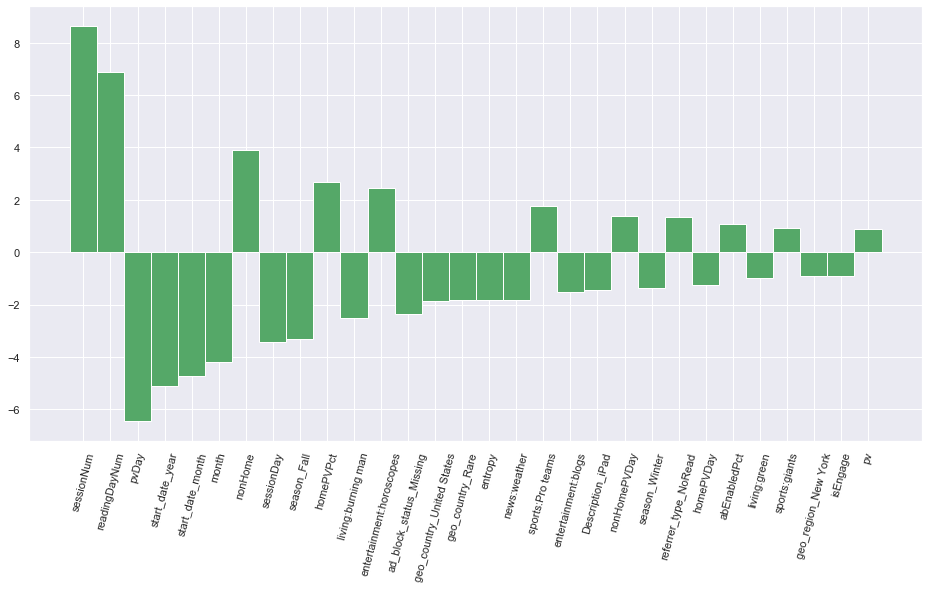

In [162]:
fig = plt.gcf()
fig.set_size_inches(16,8, forward = False)
plt.bar(sorted_x.keys(), sorted_x.values(), width = 1, color='g')
plt.xticks(rotation = 75)
plt.show()

In [163]:
# (2) Random forest (down to 10-20 variables) 
model = RandomForestClassifier(max_depth= 30, random_state=1108,
                              n_estimators=100)
model.fit(X_train[important_features], rock_star_next_month_train)
predictions = model.predict(X_test[important_features])
print('Prediction rock_star_next_month using Lasso + RandomForest:')
print('AUC: ', roc_auc_score(rock_star_next_month_test, predictions))

Prediction rock_star_next_month using Lasso + RandomForest:
AUC:  0.8058706908209986


In [164]:
# NN
clf = MLPClassifier(solver='adam',activation='tanh', alpha=0.01,learning_rate = 'adaptive', 
                   hidden_layer_sizes=(5,3),max_iter = 2000, random_state=16889, 
                   early_stopping = True)
clf.fit(X_train[important_features], rock_star_next_month_train)
predictions = clf.predict(X_test[important_features])
# print(clf.coefs_)
print('Prediction rock_star_next_month using Lasso + NN:')
print('AUC: ', roc_auc_score(rock_star_next_month_test, predictions))

Prediction rock_star_next_month using Lasso + NN:
AUC:  0.8307121121711945


In [165]:
# NN
clf = MLPClassifier(solver='adam',activation='tanh', alpha=0.01,learning_rate = 'adaptive', 
                   hidden_layer_sizes=(5,3),max_iter = 2000, random_state=16889, 
                   early_stopping = True)
clf.fit(X_train_pca, rock_star_next_month_train)
predictions = clf.predict(X_test_pca)
# print(clf.coefs_)
print('Prediction rock_star_next_month using PCA + NN:')
print('AUC: ', roc_auc_score(rock_star_next_month_test, predictions))

Prediction rock_star_next_month using PCA + NN:
AUC:  0.6886645800095558
